In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0


In [5]:
data.shape

(169907, 19)

In [7]:
data.isna().sum()

id                  0
name                0
artists             0
duration_ms         0
release_date        0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64

100%|██████████| 13/13 [01:07<00:00,  5.16s/it]


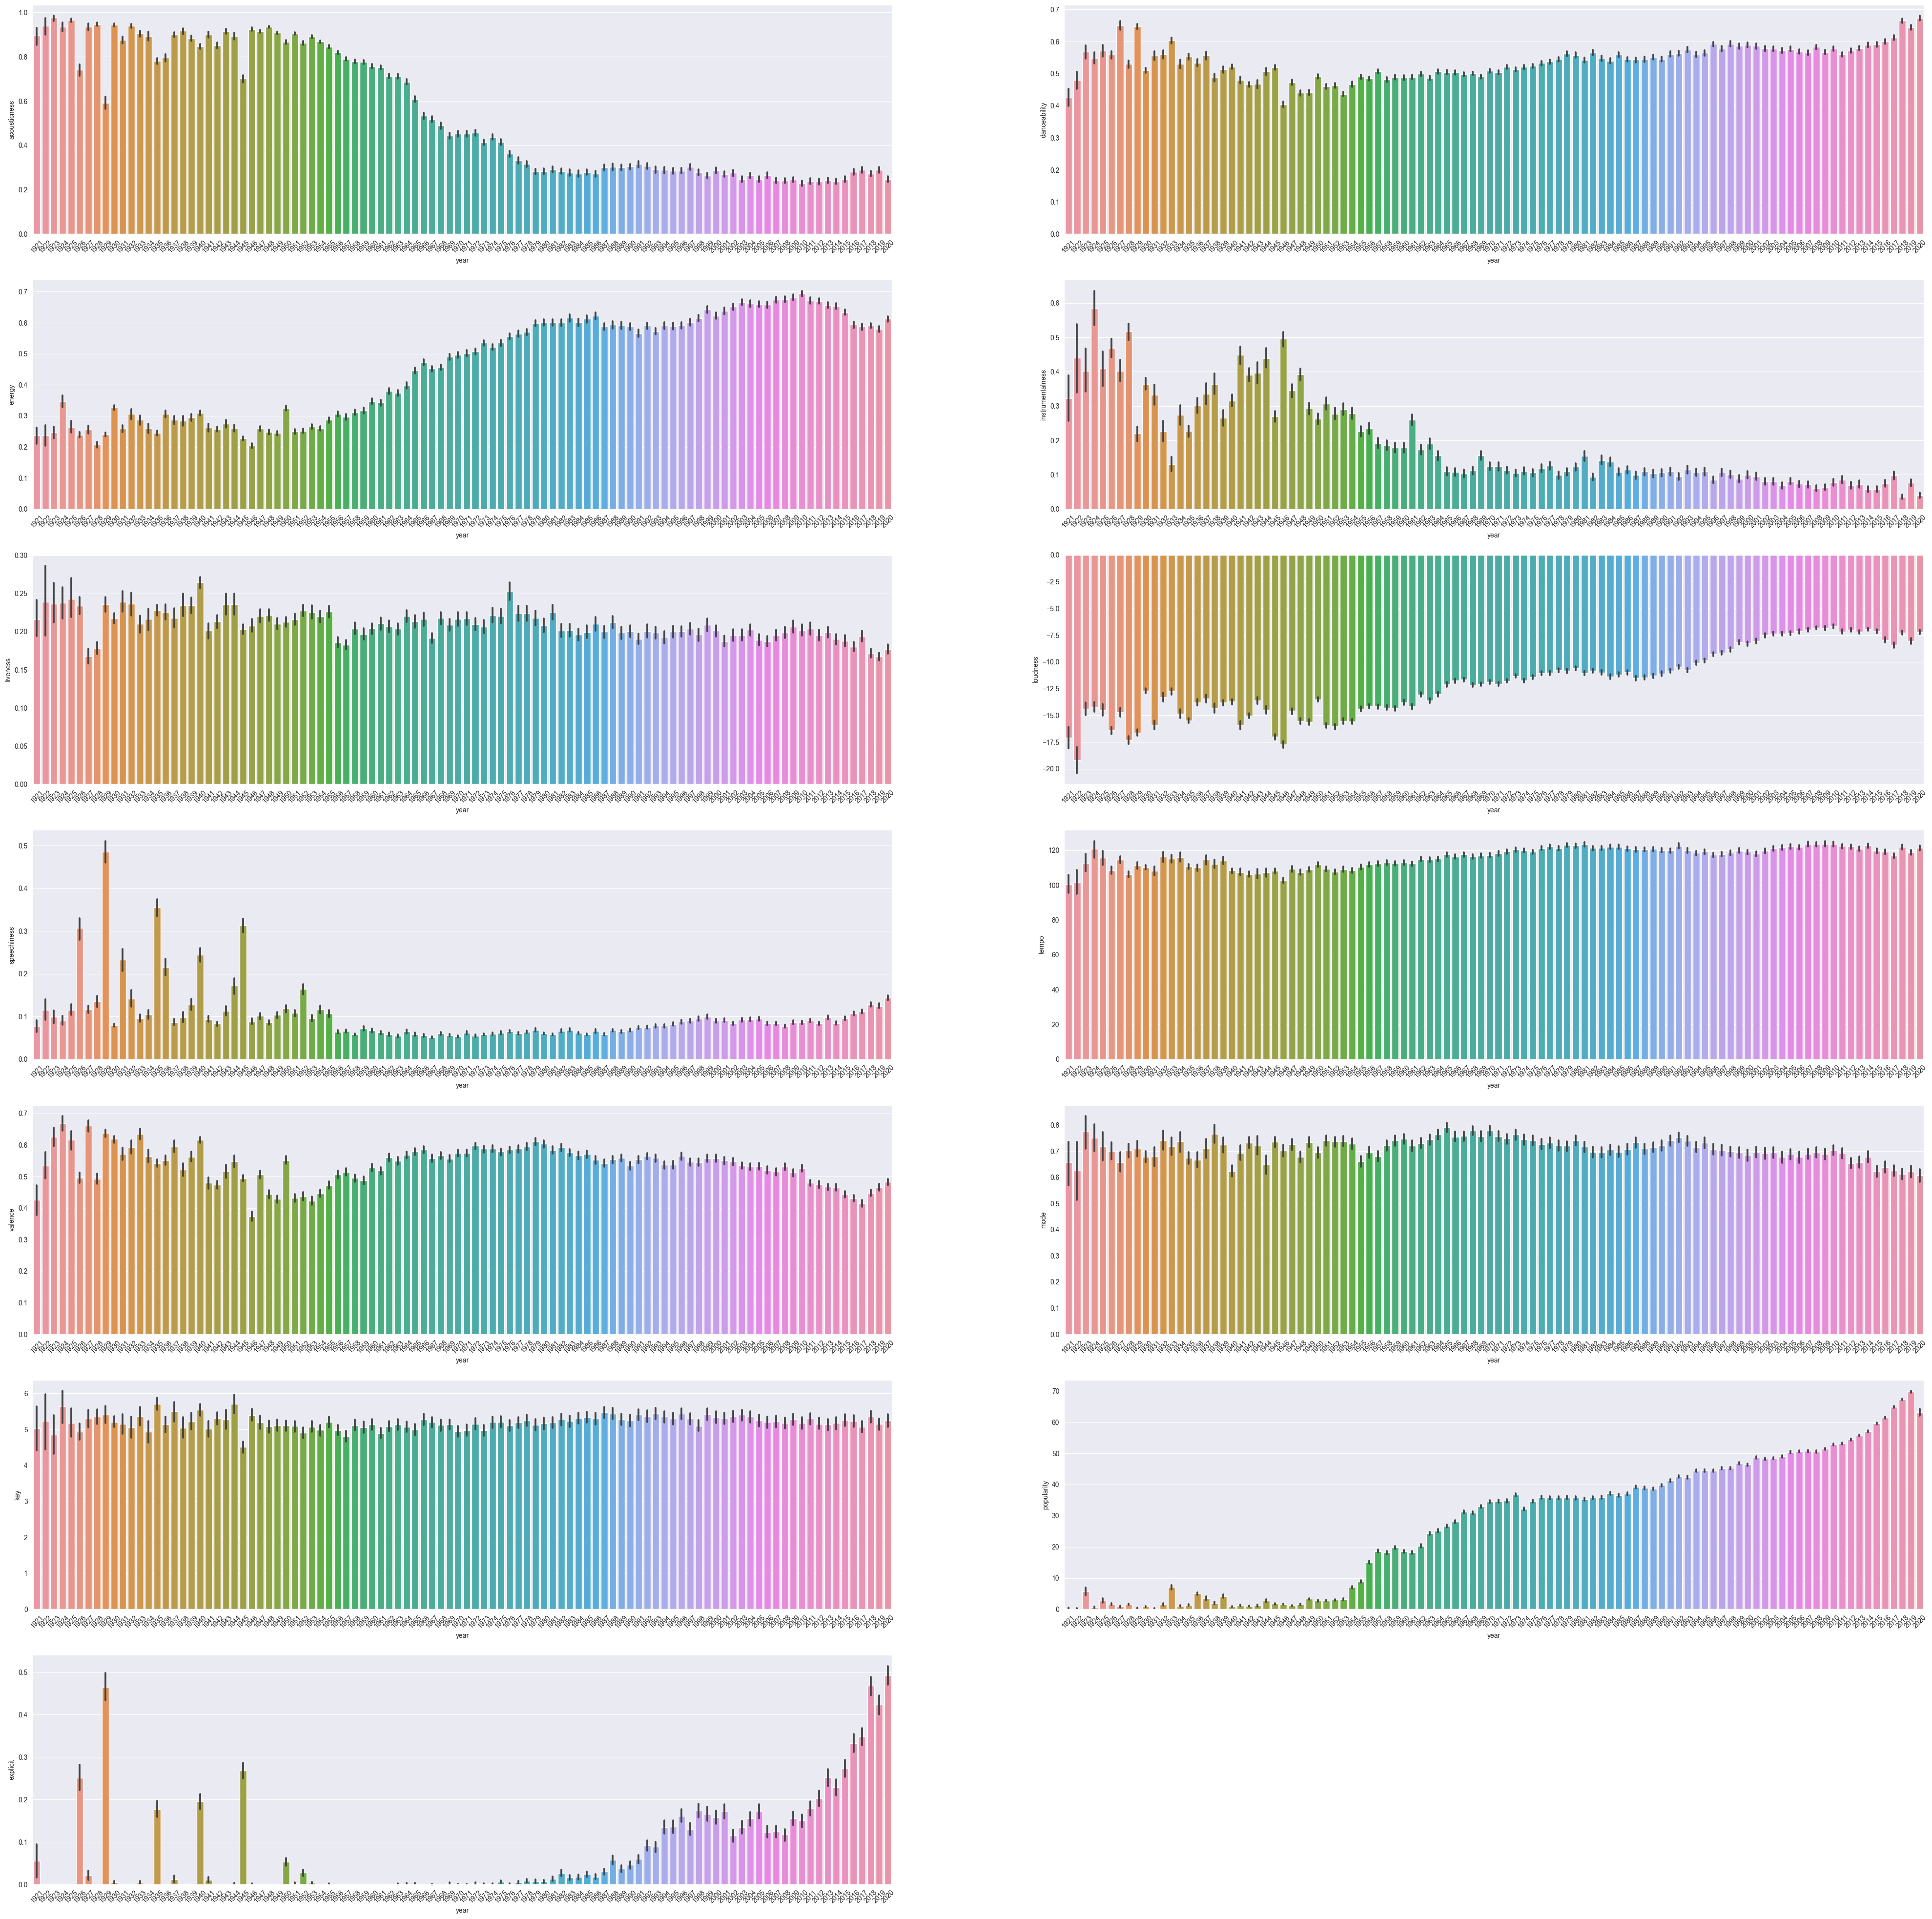

In [9]:
new_data=data.drop(columns=['id','name', 'artists', 'release_date', "year"])
plt.figure(figsize=(50,50))
for i in tqdm(np.arange(1,len(new_data.columns))):
    plt.subplot(7,2,i)
    sns.barplot(x=data.year ,y=new_data[new_data.columns[i  ]])
    plt.xticks(rotation=45)
plt.show()

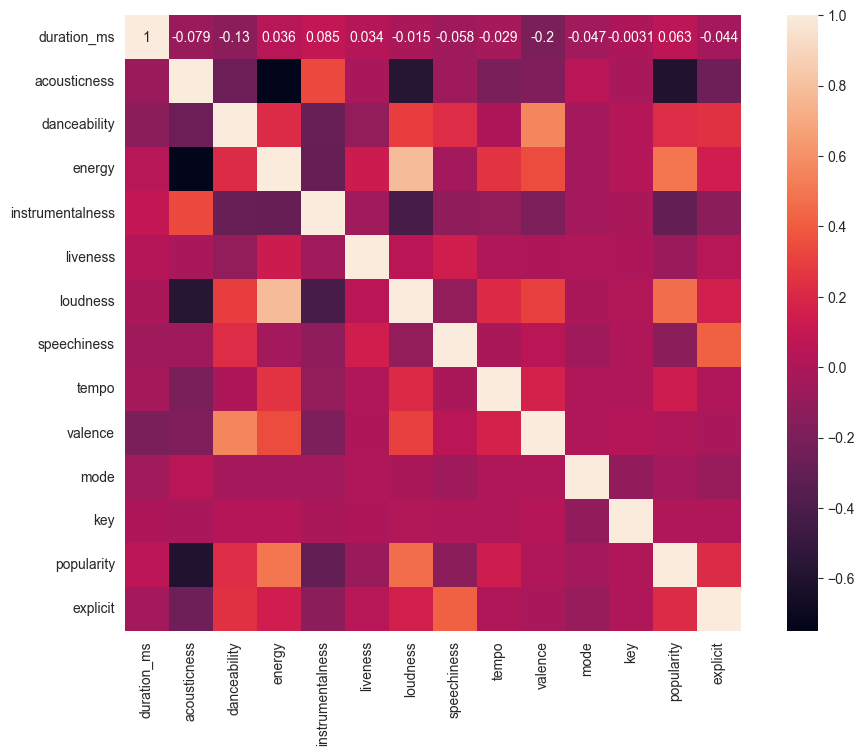

In [10]:
plt.subplots(figsize=(12, 8))
sns.heatmap(new_data.corr(), annot=True, square=True)
plt.show()

In [11]:
data.head(2)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.525,0.600,0.54,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.228,0.368,0.48,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0


In [13]:
def normalize_column(col):
    max_d=data[col].max()
    min_d=data[col].min()
    data[col]= (data[col]-min_d)/(max_d-min_d)

In [22]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

In [15]:
data.head(3)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],0.039910,11/1/66,0.454545,0.527108,0.607287,0.540,0.00305,0.100,0.754788,0.033849,0.515783,0.547,1.0,0.818182,0.26,0.0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],0.028292,2/28/83,0.626263,0.228916,0.372470,0.480,0.70700,0.159,0.757889,0.031579,0.615205,0.338,1.0,0.727273,0.21,0.0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],0.040955,8/20/83,0.626263,0.100201,0.275304,0.684,0.01450,0.946,0.787284,0.052116,0.586171,0.279,1.0,0.727273,0.41,0.0


In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
data['cat'] = cat
normalize_column('cat')

In [17]:
data.cat[:10]

0    0.111111
1    0.777778
2    0.111111
3    0.777778
4    0.777778
5    0.111111
6    0.777778
7    0.777778
8    0.111111
9    0.111111
Name: cat, dtype: float64

In [18]:
caya=data[data.name=='Come As You Are']
caya.head(3)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,cat
26260,0LnkNEgEXv83bVVvgnB9Et,Come As You Are,['Nirvana'],0.039629,10/29/02,0.818182,0.000084,0.495951,0.835,0.00373,0.0908,0.840608,0.034262,0.491292,0.519,0.0,0.363636,0.47,0.0,0.111111
26261,7aCSKL5LmVhakVs0l483B5,Come As You Are,['Nirvana'],0.039607,9/26/91,0.707071,0.000161,0.506073,0.824,0.00161,0.0916,0.848078,0.040041,0.492132,0.539,0.0,0.363636,0.40,0.0,0.111111
26262,3sYWyVGfPuit80szWXhrRA,Come As You Are,['Nirvana'],0.046088,11/1/94,0.737374,0.556225,0.691296,0.766,0.00346,0.0815,0.802866,0.042312,0.488301,0.568,0.0,0.454545,0.64,0.0,0.444444


In [34]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        #our class should understand which data to work with
        self.rec_data_ = rec_data
    
    #if we need to change data
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
        #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #indeces of non-numerical columns
                if not col in [1, 6, 12, 14, 18]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

In [35]:
recommender = SpotifyRecommender(data)

In [36]:
recommender.get_recommendations('come as you are', 5)

  0%|          | 0/169900 [00:00<?, ?it/s]


ValueError: could not convert string to float: '0LnkNEgEXv83bVVvgnB9Et'